## Importing Datasets and Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import layers
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import train_test_split


###Get Data

In [2]:
df=pd.read_csv("Comments.csv")


In [3]:
df

,comments,target
0,This guy actually puts in a lot of effort in h...,suggestion
1,"I've learnt HTML, CSS, Javascript and Python a...",suggestion
2,Watched this video one year ago to start my co...,suggestion
3,His teaching is the most effective I've found ...,suggestion
4,"I finally finished the whole 4 hours, and now ...",positive
...,...,...
2459,Who are those 9 fools disliked the video.,question
2460,Anyone from karnataka??,question
2461,6th person to comment,other
2462,Things,other


###Preprocessing Data

In [4]:
df["target"].value_counts()

positive      1050
other          560
question       448
suggestion     406
Name: target, dtype: int64

In [5]:
df['comments'] = df['comments'].str.replace("[^a-zA-Z?!#]", " ")   #remove all exception - !?#

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [6]:
df

,comments,target
0,This guy actually puts in a lot of effort in h...,suggestion
1,I ve learnt HTML CSS Javascript and Python a...,suggestion
2,Watched this video one year ago to start my co...,suggestion
3,His teaching is the most effective I ve found ...,suggestion
4,I finally finished the whole hours and now ...,positive
...,...,...
2459,Who are those fools disliked the video,question
2460,Anyone from karnataka??,question
2461,th person to comment,other
2462,Things,other


In [7]:
X=df['comments']
y=df['target']

In [8]:
X.shape , y.shape

((2464,), (2464,))

#Splitting Data into Training and Test Dataset

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

positive      937
other         505
question      401
suggestion    374
Name: target, dtype: int64
positive      113
other          55
question       47
suggestion     32
Name: target, dtype: int64


In [10]:
X_train

1788                                                     
617                                 Really appreciate it!
1289    turn on subtitles            I m sorry  I cann...
196     This is a good tutorial for anyone who is inte...
809     Does this tutorial help? Should I watch it as ...
                              ...                        
1638    Great course but I would recommend everyone to...
1095    having   exams tomorrow and after it  i still ...
1130    Not sure if it s to do with version  but I had...
1294                                      Anime          
860     This is just toned down Java   Bruh           ...
Name: comments, Length: 2217, dtype: object

In [65]:
train_sentences=X_train.to_list()
test_sentences=X_test.to_list()
len(train_sentences) , len(test_sentences)

(2217, 247)

##One hot and label encoder

In [48]:
#one hot encode
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder(sparse=False)
train_labels_one_hot=one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1,1))
test_labels_one_hot=one_hot_encoder.transform(y_test.to_numpy().reshape(-1,1))

# Check what training labels look like
train_labels_one_hot

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [49]:
# Extract labels ("target" columns) and encode them into integers 
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
train_labels_encoded=label_encoder.fit_transform(y_train.to_numpy())
test_labels_encoded=label_encoder.fit_transform(y_test.to_numpy())

# Check what training labels look like
train_labels_encoded

array([0, 1, 0, ..., 2, 0, 2])

In [50]:
# Get class names and number of classes from LabelEncoder instance
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(4, array(['other', 'positive', 'question', 'suggestion'], dtype=object))

#Preparing our data for deep sequence models

In [51]:
# How long is each sentence on average?
sent_lens = [len(sentence.split()) for sentence in train_sentences]
avg_sent_len = np.mean(sent_lens)
avg_sent_len # return average sentence length (in tokens)

20.16914749661705

(array([1.781e+03, 3.150e+02, 8.800e+01, 1.900e+01, 1.000e+01, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  30.3,  60.6,  90.9, 121.2, 151.5, 181.8, 212.1, 242.4,
        272.7, 303. ]),
 <a list of 10 Patch objects>)

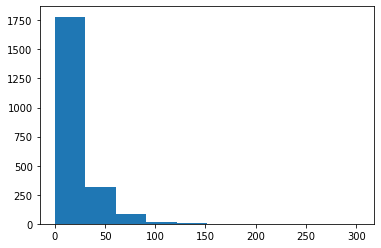

In [52]:
plt.hist(sent_lens,bins=10)

In [53]:
output_seq_len=int(np.percentile(sent_lens,95))
output_seq_len

65

In [54]:
max(sent_lens)

303

##Create text vectorizer

In [55]:
# Create text vectorizerz
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer=TextVectorization(output_sequence_length=output_seq_len)

In [56]:
text_vectorizer.adapt(train_sentences)

In [57]:
# Test out text vectorizer
target_sentence=random.choice(train_sentences)
print(f"Text :\n{target_sentence}")
print(f"\nLength of text : {len(target_sentence.split())}")
print(f"\nVectorized_test : {text_vectorizer(target_sentence)}")

Text :
Okay  I joke you not  I have been watching Naruto for like a week and starting to get a little burned out  So I am watching this video and think   Hey maybe Ill watch Lost for the  th time  it has been a while since my last watchthrough   So within    seconds or so after that  I get to          That just made my whole night  Thank you for that subtle reference  and this tutorial 

Length of text : 73

Vectorized_test : [1017    2  790    6   55    2   26  165  109 2613   10   37    4  454
    7  284    5   73    4  373 3420   95   15    2   57  109    8   16
    7  207  293  490  798  212  263   10    3  564   97   12  120  165
    4   86  304   18  390 1938   15  680  984   68   15   83   17    2
   73    5   17   28  129   18  143 1579   20]


In [58]:
# How many words in our training vocabulary?
vocab=text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary :{len(vocab)}")
print(f"Most common words in vocabulary :{vocab[:5]}")
print(f"Least common words in vocabulary :{vocab[-5:]}")

Number of words in vocabulary :3607
Most common words in vocabulary :['', '[UNK]', 'i', 'the', 'a']
Least common words in vocabulary :['abstraction', 'absence', 'abrupt', 'abilities', 'aayaaa']


In [59]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': None,
 'name': 'text_vectorization_1',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 65,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

##Create custom text embedding

In [60]:
token_embed=layers.Embedding(input_dim=len(vocab),
                             output_dim=128,
                             mask_zero=True,
                             name="token_embedding")

In [61]:
print(f"Sentence before vectorization: \n{target_sentence}")
vectorized_sentence=text_vectorizer([target_sentence])
print(f"\nSentence after vectorization(before embedding): \n{vectorized_sentence}")
embedded_sentence=token_embed(vectorized_sentence)
print(f"\nSentece after embedding: \n{embedded_sentence}")


Sentence before vectorization: 
Okay  I joke you not  I have been watching Naruto for like a week and starting to get a little burned out  So I am watching this video and think   Hey maybe Ill watch Lost for the  th time  it has been a while since my last watchthrough   So within    seconds or so after that  I get to          That just made my whole night  Thank you for that subtle reference  and this tutorial 

Sentence after vectorization(before embedding): 
[[1017    2  790    6   55    2   26  165  109 2613   10   37    4  454
     7  284    5   73    4  373 3420   95   15    2   57  109    8   16
     7  207  293  490  798  212  263   10    3  564   97   12  120  165
     4   86  304   18  390 1938   15  680  984   68   15   83   17    2
    73    5   17   28  129   18  143 1579   20]]

Sentece after embedding: 
[[[-0.02928541 -0.0067143   0.04658333 ...  0.02517874 -0.01728183
    0.02280918]
  [ 0.00456344  0.01301548  0.01829245 ... -0.03581589  0.03546648
    0.03112246]
  [ 0

In [62]:
print(embedded_sentence.shape)

(1, 65, 128)


#Create datasets

In [79]:
#Turning our data into Tensorflow datasets
train_dataset=tf.data.Dataset.from_tensor_slices((train_sentences,train_labels_one_hot))
test_dataset=tf.data.Dataset.from_tensor_slices((test_sentences,test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [80]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset=train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

#Model 1 : Conv1D with token embedding

In [81]:
# Create 1D convolutional model to process sequences
inputs=layers.Input(shape=(1,),dtype=tf.string)
text_vector=text_vectorizer(inputs)
token_embedding=token_embed(text_vector)
x=layers.Conv1D(128,kernel_size=5,padding='same',activation='relu')(token_embedding)
x=layers.Conv1D(64,kernel_size=5,padding='same',activation='relu')(token_embedding)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)
model_1=tf.keras.Model(inputs,outputs)

#Compile
model_1.compile(loss='categorical_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

In [82]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 65)               0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 65, 128)          461696    
                                                                 
 conv1d_6 (Conv1D)           (None, 65, 64)            41024     
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 260 

In [86]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',mode='min',patience=2,verbose=1)

In [87]:
model_1_history=model_1.fit(train_dataset,
                            epochs=25,
                            steps_per_epoch=len(train_dataset),
                            validation_data=test_dataset,
                            validation_steps=len(test_dataset),
                            callbacks=[early_stopping])

Epoch 1/25
70/70 [==============================] - 2s 35ms/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 2.2036 - val_accuracy: 0.7085
Epoch 2/25
70/70 [==============================] - 2s 34ms/step - loss: 0.0233 - accuracy: 0.9946 - val_loss: 2.2335 - val_accuracy: 0.7126
Epoch 3/25
70/70 [==============================] - 2s 35ms/step - loss: 0.0223 - accuracy: 0.9950 - val_loss: 2.2636 - val_accuracy: 0.7045
Epoch 3: early stopping


In [88]:
model_1.evaluate(test_dataset)

8/8 [==============================] - 0s 6ms/step - loss: 2.2636 - accuracy: 0.7045


[2.263619899749756, 0.7044534683227539]

In [ ]:
model_1_pred_prob=model_1.predict(test_dataset)
model_1_pred_prob

In [92]:
model_1_pred=tf.argmax(model_1_pred_prob,axis=1)
model_1_pred

<tf.Tensor: shape=(247,), dtype=int64, numpy=
array([3, 1, 3, 1, 2, 0, 2, 3, 0, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 2, 3,
       1, 0, 1, 1, 0, 3, 3, 1, 0, 1, 0, 1, 0, 2, 3, 1, 2, 3, 1, 2, 1, 2,
       2, 2, 1, 3, 2, 1, 0, 0, 1, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1,
       3, 1, 1, 3, 3, 2, 1, 1, 3, 3, 2, 1, 0, 2, 1, 1, 2, 2, 1, 0, 1, 3,
       0, 2, 0, 0, 0, 1, 0, 2, 3, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 3, 1, 0, 1, 0, 2, 1, 2, 3, 2, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1,
       3, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 3, 1, 1,
       1, 3, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 0, 3, 1, 0, 2, 2, 1, 1, 3, 2,
       0, 1, 1, 1, 1, 2, 2, 3, 2, 3, 0, 0, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 2, 3, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 2, 1, 1, 3])>

In [93]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-02 04:01:23--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-02 04:01:23 (49.3 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [94]:
from helper_functions import calculate_results

In [120]:
model_1_results=calculate_results(y_true=test_labels_encoded,
                                  y_pred=model_1_pred)
model_1_results

{'accuracy': 70.44534412955466,
 'f1': 0.7021651436166771,
 'precision': 0.7069420345736135,
 'recall': 0.7044534412955465}

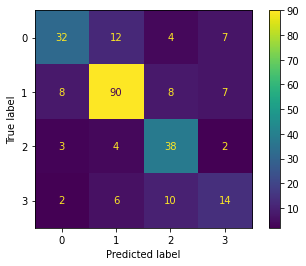

In [122]:
matrix=confusion_matrix(test_labels_encoded,model_1_pred)
t=ConfusionMatrixDisplay(matrix)
t.plot()

#Model 2: Feature extraction with pretrained token embedding

In [99]:
# Download pretrained TensorFlow Hub USE
import tensorflow_hub as hub
tf_hub_embedding_layer=hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
random_sentence=random.choice(train_sentences)
print(f"Random training sentence:\n {train_sentences}")
embed_sentence=tf_hub_embedding_layer([random_sentence])
print(f"Sentence after embedding:\n {embed_sentence[0]}")
print(f"Length of embedding:\n {len(embed_sentence[0])}")

In [103]:
inputs=layers.Input(shape=[],dtype=tf.string)
pretrained_embedding=tf_hub_embedding_layer(inputs)
x=layers.Dense(128,activation='relu')(pretrained_embedding)
x=layers.Dropout(0.2)(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(32,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(16,activation='relu')(x)
x=layers.Dropout(0.2)(x)
outputs=layers.Dense(num_classes,activation='softmax')(x)

model_2=tf.keras.Model(inputs,outputs)

model_2.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [104]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_9 (Dense)             (None, 128)               65664     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                           

In [105]:
model_2_history=model_2.fit(train_dataset,
                            epochs=50,
                            validation_data=test_dataset,
                            callbacks=[early_stopping])


Epoch 1/50
70/70 [==============================] - 8s 52ms/step - loss: 1.1376 - accuracy: 0.4714 - val_loss: 0.8649 - val_accuracy: 0.6599
Epoch 2/50
70/70 [==============================] - 2s 23ms/step - loss: 0.8420 - accuracy: 0.6613 - val_loss: 0.7189 - val_accuracy: 0.7166
Epoch 3/50
70/70 [==============================] - 2s 24ms/step - loss: 0.7140 - accuracy: 0.7181 - val_loss: 0.6812 - val_accuracy: 0.7449
Epoch 4/50
70/70 [==============================] - 2s 24ms/step - loss: 0.6638 - accuracy: 0.7343 - val_loss: 0.6636 - val_accuracy: 0.7530
Epoch 5/50
70/70 [==============================] - 2s 24ms/step - loss: 0.6126 - accuracy: 0.7673 - val_loss: 0.6682 - val_accuracy: 0.7530
Epoch 6/50
70/70 [==============================] - 2s 24ms/step - loss: 0.5489 - accuracy: 0.8002 - val_loss: 0.6729 - val_accuracy: 0.7733
Epoch 6: early stopping


In [106]:
model_2.evaluate(test_dataset)

8/8 [==============================] - 0s 22ms/step - loss: 0.6729 - accuracy: 0.7733


[0.6729310750961304, 0.7732793688774109]

In [ ]:
model_2_pred_prob=model_2.predict(test_dataset)
model_2_pred_prob

In [108]:
model_2_preds=tf.argmax(model_2_pred_prob,axis=1)
model_2_preds

<tf.Tensor: shape=(247,), dtype=int64, numpy=
array([3, 1, 3, 1, 2, 1, 2, 3, 0, 1, 1, 0, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2,
       0, 2, 1, 3, 2, 1, 0, 0, 1, 2, 2, 2, 3, 1, 2, 1, 1, 1, 1, 2, 0, 2,
       3, 1, 1, 0, 1, 2, 1, 3, 1, 3, 2, 1, 0, 3, 1, 1, 2, 2, 1, 1, 1, 3,
       0, 2, 0, 0, 0, 1, 3, 3, 3, 1, 2, 0, 1, 2, 0, 3, 1, 2, 1, 1, 3, 1,
       3, 0, 3, 1, 3, 3, 0, 2, 1, 2, 3, 2, 2, 1, 1, 0, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 3, 1,
       0, 3, 0, 1, 1, 0, 1, 2, 1, 3, 0, 1, 2, 0, 2, 2, 0, 2, 3, 3, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 0, 1, 3, 0, 1, 0, 3, 1, 0, 3, 2, 1, 1, 3, 2,
       3, 1, 0, 1, 1, 3, 2, 1, 3, 3, 0, 2, 2, 0, 1, 0, 0, 1, 0, 2, 2, 2,
       3, 1, 0, 3, 0, 3, 3, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 3,
       2, 2, 1, 3, 2])>

In [110]:
model_2_results=calculate_results(y_true=test_labels_encoded,y_pred=model_2_preds)
model_2_results

{'accuracy': 77.32793522267207,
 'f1': 0.7789526955039421,
 'precision': 0.7906763421656423,
 'recall': 0.7732793522267206}

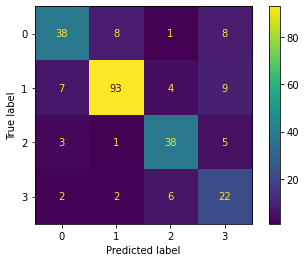

In [118]:
matrix=confusion_matrix(test_labels_encoded,model_2_preds)
t=ConfusionMatrixDisplay(matrix)
t.plot()

In [131]:
model_2.save('/content/drive/MyDrive/Saved model/youtube_3k/model_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Saved model/youtube_3k/model_2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Saved model/youtube_3k/model_2/assets


In [125]:
model_2.save('/content/drive/MyDrive/Saved model/model_2.h5')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Saved model/youtube_3k/model_2')
new_model.summary()